In [ ]:
# imports
import sys 
import random
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors 
import matplotlib.cbook as cbook 
plt.rcParams.update({'font.size': 12}) 
import mpld3 
import ast
#import ROOT
import uproot3 as ur3
import uproot as ur4
import pandas as pd 
from tqdm import tqdm 
from scipy.optimize import curve_fit 
from scipy import stats
from scipy.signal import lfilter, filtfilt
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
import scipy.integrate as integrate
from lmfit import Model
import threading
from pathlib import Path
from matplotlib import gridspec
import datetime
import matplotlib.ticker as mticker
import time
import pathlib
import awkward as ak
import pprint
import pickle
import struct
from os.path import exists

In [ ]:
#Global timestamp timeevolution
runs = [3741,3758,3760,218,4224,4225,4226,4227,4228,4239]
filelocation = "/ANNIE/ANNIE_RAWData/"
filenames = ["/GlobalTimeStamp_L0","/GlobalTimeStamp_L2"]

for irun,run in enumerate(runs):
    fig = plt.figure(irun, figsize=[10,10], facecolor='white') 
    for ifilename,filename in enumerate(filenames):
        timestamp = []
        frametype = []
        value = []
        dt = []
        with open(filelocation+str(run)+filename, 'r') as file:
            for line in file:
                try:
                    raw_ts, raw_type = line.strip().split(',')
                    timestamp.append(int(raw_ts))
                    frametype.append(raw_type)
                except ValueError:
                    continue

            if len(timestamp)==0:
                continue
                
            timestamp = np.array(timestamp)/1000

            for entry in frametype:
                if entry == "pps":
                    value.append(-1)
                elif entry=="data":
                    value.append(1)
                else:
                    value.append(0)
            value = np.array(value)

            for idt in range(0,len(timestamp)-1):
                dt.append(timestamp[idt+1] - timestamp[idt]) 
            dt=np.array(dt)       

            if ifilename==0:
                labelname = "R"+str(run)+"-L0"
            elif ifilename==1:
                labelname = "R"+str(run)+"-L2"
            else:
                print("Waring")

        plt.plot(dt,label=labelname)
        
    plt.legend()
    plt.xlabel("Event")
    plt.ylabel("time difference between events in s")
    plt.savefig("/ANNIE/Run Evaluation/EventTimeEvo_R"+str(run)+".png", bbox_inches='tight', pad_inches = 0.5)
    plt.close()

            # binwidth = 1
            # plt.hist(dt,bins=np.arange(min(dt), max(dt) + binwidth, binwidth),label=labelname,histtype='stepfilled',alpha=0.6,log=True)
            # plt.legend()
            # plt.xlabel("time difference between events in s")
            # plt.ylabel("count")
            # plt.savefig("/ANNIE/Run Evaluation/EventTimeHist_R"+str(run)+".png", bbox_inches='tight', pad_inches = 0.5)
            # plt.close()

In [ ]:
#Global timestamp histogram
runs = [3741,3758,3760,4218,4224,4225,4226,4227,4228,4239]
filelocation = "/ANNIE/ANNIE_RAWData/"
filenames = ["/GlobalTimeStamp_L0","/GlobalTimeStamp_L2"]

for irun,run in enumerate(runs):
    fig = plt.figure(irun, figsize=[10,10], facecolor='white') 
    for ifilename,filename in enumerate(filenames):
        timestamp = []
        frametype = []
        value = []
        dt = []
        with open(filelocation+str(run)+filename, 'r') as file:
            for line in file:
                try:
                    raw_ts, raw_type = line.strip().split(',')
                    timestamp.append(int(raw_ts))
                    frametype.append(raw_type)
                except ValueError:
                    continue 

            if len(timestamp)==0:
                continue
                
            timestamp = np.array(timestamp)/1000

            for entry in frametype:
                if entry == "pps":
                    value.append(-1)
                elif entry=="data":
                    value.append(1)
                else:
                    value.append(0)
            value = np.array(value)

            for idt in range(0,len(timestamp)-1):
                dt.append(timestamp[idt+1] - timestamp[idt]) 
            dt=np.array(dt)       

            if ifilename==0:
                labelname = "R"+str(run)+"-L0"
            elif ifilename==1:
                labelname = "R"+str(run)+"-L2"
            else:
                print("Waring")

            binwidth = 0.25
            plt.hist(dt,bins=np.arange(min(dt), max(dt) + binwidth, binwidth),label=labelname,histtype='stepfilled',alpha=0.6,log=True)
    plt.legend()
    plt.xlabel("time difference between events in s")
    plt.ylabel("count")
    plt.xlim([0,25])
    plt.savefig("/ANNIE/Run Evaluation/EventTimeHist_R"+str(run)+".png", bbox_inches='tight', pad_inches = 0.5)
    plt.close()

In [ ]:
#Psec timestamp timeevolution
runs = [4218,4224,4225,4226,4227,4228,4239]
filelocation = "/ANNIE/ANNIE_RAWData/"
filenames = ["/TimeCompare_L0","/TimeCompare_L2"]

for irun,run in enumerate(runs):
    fig = plt.figure(irun, figsize=[10,10], facecolor='white') 
    for ifilename,filename in enumerate(filenames):
        timestamp = []
        dt = []
        with open(filelocation+str(run)+filename, 'r') as file:
            for line in file:
                raw_ts_psec, raw_ts_rpi = line.strip().split(',')
                timestamp.append(int(raw_ts_psec))

            if len(timestamp)==0:
                continue
                
            timestamp = np.array(timestamp)/320000000

            for idt in range(0,len(timestamp)-1):
                if timestamp[idt+1]>timestamp[idt]:
                    dt.append(timestamp[idt+1] - timestamp[idt]) 
            dt=np.array(dt)    
            if len(dt)!=0: 
                print("R{} min dt = {}".format(run,1/np.min(dt)))
            
            if ifilename==0:
                labelname = "R"+str(run)+"-L0"
            elif ifilename==1:
                labelname = "R"+str(run)+"-L2"
            else:
                print("Waring")

        plt.plot(dt,label=labelname)
    plt.legend()
    plt.xlabel("Event")
    plt.ylabel("time difference between events in s")
    plt.savefig("/ANNIE/Run Evaluation/PEventTimeEvo_R"+str(run)+".png", bbox_inches='tight', pad_inches = 0.5)
    plt.close()

        # if len(dt)>0:
        #     binwidth = 1
        #     plt.hist(dt,bins=np.arange(min(dt), max(dt) + binwidth, binwidth),label=labelname,histtype='stepfilled',alpha=0.6,log=True)
        #     plt.legend()
        #     plt.xlabel("time difference between events in s")
        #     plt.ylabel("count")
        #     plt.savefig("/ANNIE/Run Evaluation/PEventTimeHist_R"+str(run)+".png", bbox_inches='tight', pad_inches = 0.5)


In [ ]:
#Psec timestamp histogram
runs = [3741,3758,3760,4218,4224,4225,4226,4227,4228,4239,4243]
filelocation = "/ANNIE/ANNIE_RAWData/"
filenames = ["/TimeCompare_L0","/TimeCompare_L2"]
fulldt = []
runentries = [0]
eventcount  = 0
for irun,run in enumerate(runs):
    fig = plt.figure(irun, figsize=[10,10], facecolor='white') 
    for ifilename,filename in enumerate(filenames):
        timestamp = []
        dt = []
        with open(filelocation+str(run)+filename, 'r') as file:
            for line in file:
                try:
                    raw_ts_psec, raw_ts_rpi,x = line.strip().split(',')
                except:
                    raw_ts_psec, raw_ts_rpi = line.strip().split(',')
                timestamp.append(int(raw_ts_psec))
        

            if len(timestamp)==0:
                continue
                
            timestamp = np.array(timestamp)/320000000

            for idt in range(0,len(timestamp)-1):
                if timestamp[idt+1]>timestamp[idt]:
                    dt.append(timestamp[idt+1] - timestamp[idt]) 
                    if ifilename==0:
                        fulldt.append(timestamp[idt+1] - timestamp[idt])
                        eventcount+=1
            dt=np.array(dt)    

            colorlist = ["blue","orange"]   
            if ifilename==0:
                labelname = "LAPPD 40"
            elif ifilename==1:
                labelname = "LAPPD 63"
            else:
                print("Warning")

        if ifilename==0:
            runentries.append(eventcount)

        if len(dt)>0:
            binwidth = 0.3
            plt.hist(dt,bins=np.arange(min(dt), max(dt) + binwidth, binwidth),label=labelname,histtype='stepfilled',alpha=0.8,log=True, color=colorlist[ifilename])
    plt.legend()
    plt.title("Run {}".format(run))
    plt.xlabel("time difference between events in s")
    plt.ylabel("count")
    plt.xlim([0,25])
    plt.savefig("/ANNIE/Run Evaluation/PEventTimeHist_R"+str(run)+".png", bbox_inches='tight', pad_inches = 0.5)
    plt.close()

    
print(runentries)


In [ ]:
binwidth = 0.1
fig = plt.figure(125, figsize=[10,10], facecolor='white') 
plt.hist(fulldt,bins=np.arange(min(fulldt), max(fulldt) + binwidth, binwidth),label="LAPPD 40",histtype='stepfilled',alpha=0.8,log=True, color=colorlist[0])
plt.legend()
plt.title("Runs 3741,3758,3760,4218,4224,4225,4226,4227,4228,4239")
plt.xlabel("time difference between events in s")
plt.ylabel("count")
plt.xlim([0,25])
plt.savefig("/ANNIE/Run Evaluation/FulldtHist.png", bbox_inches='tight', pad_inches = 0.5)
plt.close()

In [ ]:
fig = plt.figure(150, figsize=[20,10], facecolor='white') 
x = range(0,len(fulldt))
plt.plot(x,fulldt,label="LAPPD 40",color='blue',marker='.',linestyle='')
plt.legend()
plt.title("Runs 3741,3758,3760,4218,4224,4225,4226,4227,4228,4239,4243")
plt.xlabel("Event")
plt.ylabel("time difference between events in s")
plt.ylim([0,25])
plt.xlim([0,33000])
for evt in runentries:
    plt.axvline(x=evt,c='r',linestyle='--')
plt.savefig("/ANNIE/Run Evaluation/Fulldt.png", bbox_inches='tight', pad_inches = 0.5)
plt.close()

In [6]:
#Beamtime
#runs = [3670,3689,3695,3742,3743,3760,3811,3817,3823,3833,3837]
#runs = [3689,3695,3742,3743,3811,3817,3823,3837]
runs = [4218,4224,4225,4226,4227,4228,4239,4243]
filelocation = "/ANNIE/ANNIE_RAWData/"
filenames = ["/BeamTime_L0","/BeamTime_L2"]
fullbdt = []
for irun,run in enumerate(runs):
    fig = plt.figure(irun, figsize=[10,10], facecolor='white') 
    for ifilename,filename in enumerate(filenames):
        timestamp = []
        btimestamp = []
        dt = []
        with open(filelocation+str(run)+filename, 'r') as file:
            for line in file:
                raw_ts, raw_bts, raw_dt = line.strip().split(',')
                timestamp.append(int(raw_ts))
                btimestamp.append(int(raw_bts))
                dt.append(int(raw_dt))


            if len(timestamp)==0:
                continue
            
            timestamp=np.array(timestamp)
            btimestamp=np.array(btimestamp)
            dt = np.array(timestamp-btimestamp)*3.125

            fullbdt.extend(timestamp-btimestamp)

            if ifilename==0:
                labelname = "R"+str(run)+"-L0"
            elif ifilename==1:
                labelname = "R"+str(run)+"-L2"
            else:
                print("Waring")

            binwidth = 150
            plt.hist(dt,bins=np.arange(min(dt), max(dt) + binwidth, binwidth),label=labelname,histtype='stepfilled',alpha=0.8,log=False,color='blue')

    plt.legend()
    plt.xlabel("time difference between events timestamp and beamgate timestamp in ns")
    plt.ylabel("count")
    plt.xlim([0,20000])
    plt.savefig("/ANNIE/Run Evaluation/BeamTime_R"+str(run)+".png", bbox_inches='tight', pad_inches = 0.5)
    plt.close()

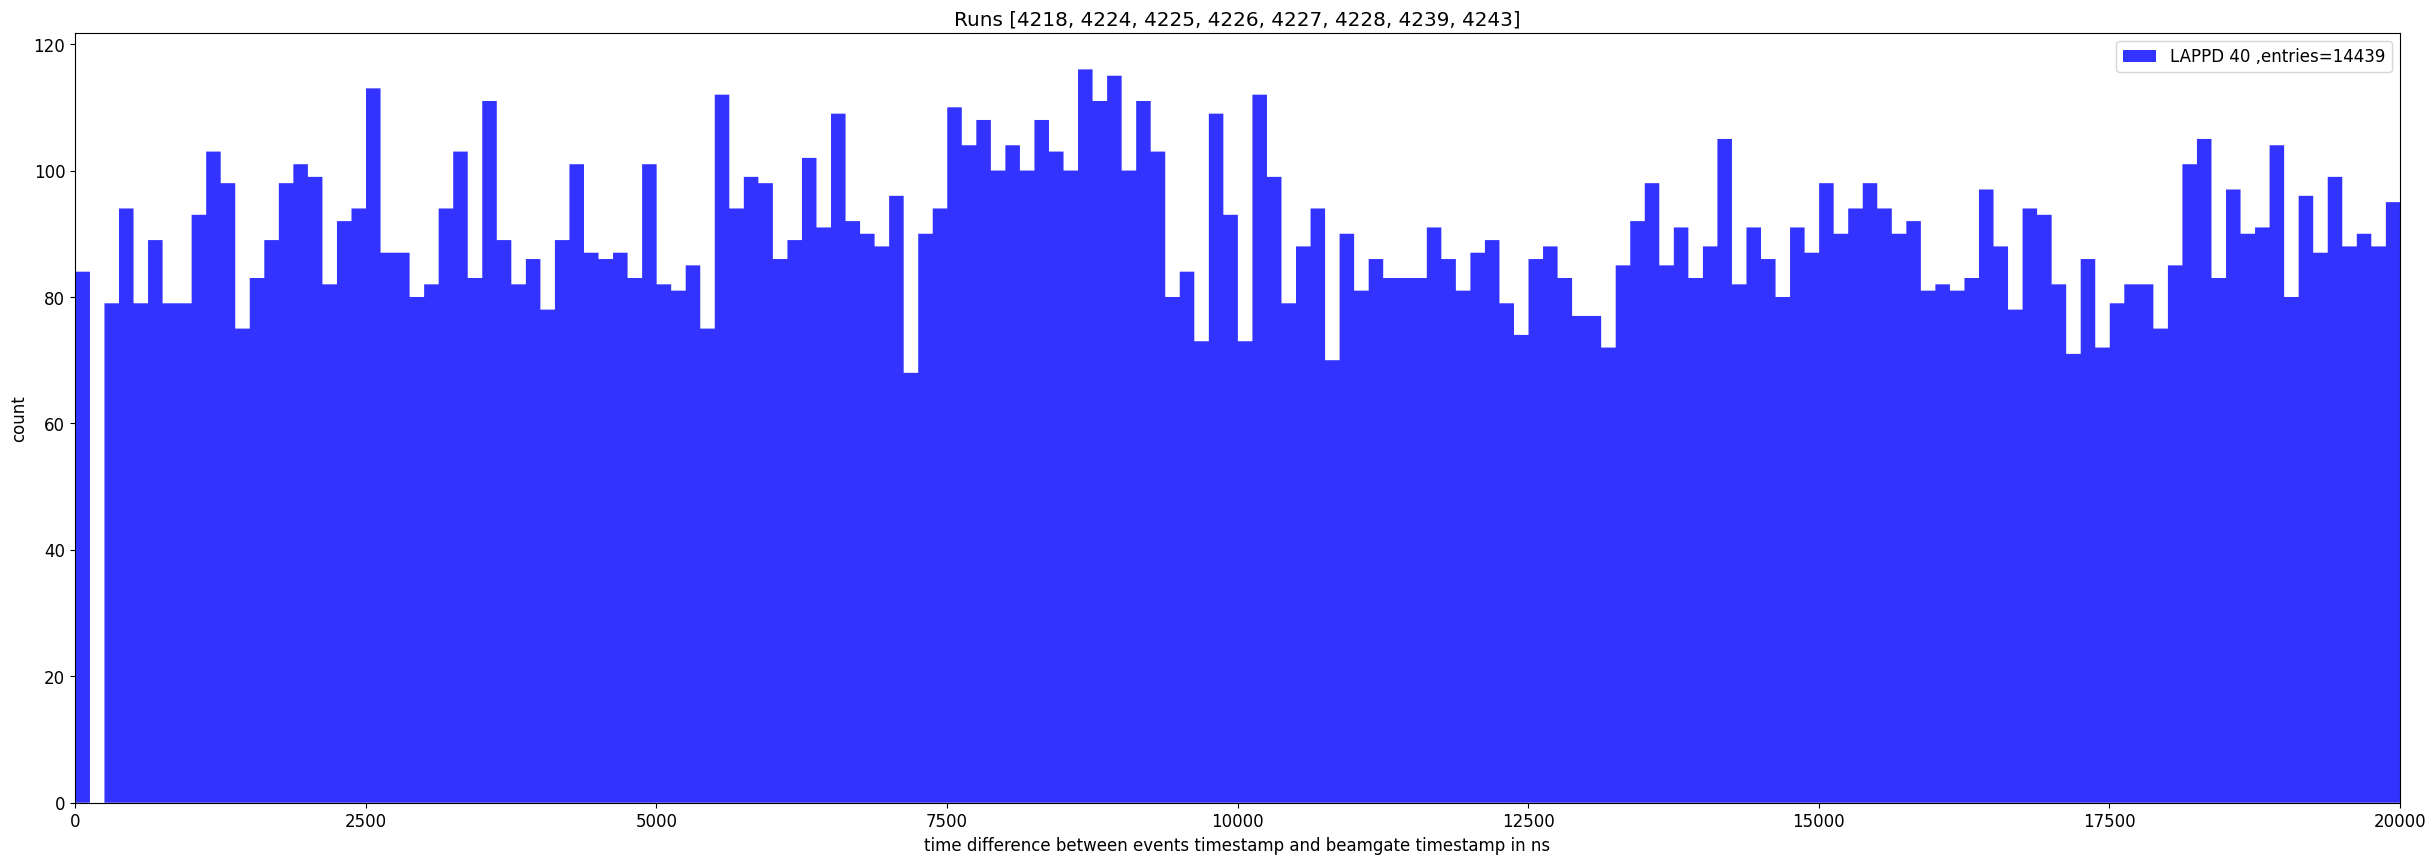

In [7]:
binwidth = 125
valuebt = np.array(fullbdt)*3.125
fig = plt.figure(125, figsize=[30,10], facecolor='white') 
plt.hist(valuebt,bins=np.arange(min(valuebt), max(valuebt) + binwidth, binwidth),label="LAPPD 40 ,entries="+str(len(valuebt)),histtype='stepfilled',alpha=0.8,log=False,color='blue')
plt.legend()
plt.title("Runs "+str(runs))
plt.xlabel("time difference between events timestamp and beamgate timestamp in ns")
plt.ylabel("count")
plt.xlim([0,20000])
plt.savefig("/ANNIE/Run Evaluation/FullbdtHist_afterSummer.png", bbox_inches='tight', pad_inches = 0.5)
#plt.close()

In [ ]:
runs = [4243]
filelocation = "/ANNIE/ANNIE_RAWData/"
filenames = ["/TimeCompare_L0"]

for irun,run in enumerate(runs):
    timestamp_rpi = []
    timestamp_psec = []
    for ifilename,filename in enumerate(filenames):
        with open(filelocation+str(run)+filename, 'r') as file:
            print("Going for {} in {}".format(ifilename,filename))
            for line in file:
                    try:
                        raw_ts1, raw_ts2, failed = line.strip().split(',')
                        timestamp_psec.append(int(raw_ts1))
                        timestamp_rpi.append(int(raw_ts2))
                        print(failed)
                    except:
                         continue


    timestamp_psec=np.array(timestamp_psec)*3.125*1e-9
    timestamp_rpi=np.array(timestamp_rpi)/1000

    dt_psec = []
    for idt in range(0,len(timestamp_psec)-1):
        dt_psec.append(timestamp_psec[idt+1] - timestamp_psec[idt]) 
    dt_psec=np.array(dt_psec)       
    
    dt_rpi = []
    for idt in range(0,len(timestamp_rpi)-1):
        dt_rpi.append(timestamp_rpi[idt+1] - timestamp_rpi[idt]) 
    dt_rpi=np.array(dt_rpi)       

    fig = plt.figure(0, figsize=[10,10], facecolor='white') 
    plt.plot(dt_psec,'k',label='PSEC dt')
    plt.plot(dt_rpi,'r',label='RPi dt')
    plt.xlabel("event")
    plt.ylabel("timedifference between events in s")
    plt.legend()
    # fig,ax = plt.subplots(figsize=[10,10])
    # ax.plot(timestamp_psec,'k',label='PSEC TS')
    # ax.set_xlabel("event")
    # ax.set_ylabel("timestamp psec value")
    # ax2=ax.twinx()
    # ax2.plot(timestamp_rpi-timestamp_rpi[0],'r',label='RPi TS')
    # ax2.set_ylabel("timestamp rpi value")
    # ax2.legend()

